In [12]:
#Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Download the data trasforming 'g' -> 1 and 'h' -> 0
destination = '/content/drive/MyDrive/MAGIC ML/data'
data = pd.read_csv(destination + '/telescope_data.csv')
data['class'] = data['class'].map({'g': 1, 'h': 0})
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [15]:
#Drop duplicate rows and data with zero width
data = data.drop_duplicates().reset_index(drop=True)
data = data[data["fWidth"] != 0].reset_index(drop=True)

In [16]:
#Target distribution
data['class'].value_counts()

,count
class,
1,12254
0,6553


In [17]:
#Add the new features created
data['Eccentricity'] = np.sqrt(1 - (data['fWidth'] / data['fLength'])**2)
data['Rooted_Asym'] = np.sqrt(np.abs(data['fAsym']))
data['Conc_Ratio'] = data['fConc'] / data['fConc1']
data['Length_Width_Ratio'] = data['fLength'] / data['fWidth']

## Preparazione Dataframe

In [18]:
# Import libraries for preprocessing, metrics e ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  precision_score, recall_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [19]:
# Split of data in train e test set
X, y = data.drop('class', axis=1), data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

## Scale-Insensitive

In [ ]:
#Train of Random Forest and print of its performaces
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("*** Random Forest classification report: ***")
print(classification_report(y_test, y_pred_rf, digits=4))

*** Random Forest classification report: ***
              precision    recall  f1-score   support

           0     0.8885    0.7475    0.8119      1311
           1     0.8755    0.9498    0.9112      2451

    accuracy                         0.8793      3762
   macro avg     0.8820    0.8487    0.8615      3762
weighted avg     0.8800    0.8793    0.8766      3762



In [ ]:
# Calculate the ratio of negative to positive samples for class imbalance adjustment
num_neg = sum(y_train == 0)
num_pos = sum(y_train == 1)
scale_pos_weight = num_neg / num_pos

#Train of XGBoost and print of its performaces
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("*** XGBoost classification report: ***")
print(classification_report(y_test, y_pred_xgb, digits=4))

*** XGBoost classification report: ***
              precision    recall  f1-score   support

           0     0.8580    0.8017    0.8289      1311
           1     0.8975    0.9290    0.9130      2451

    accuracy                         0.8846      3762
   macro avg     0.8777    0.8653    0.8709      3762
weighted avg     0.8837    0.8846    0.8837      3762



In [ ]:
# Train of Naive Bayes and print of its performaces
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

print("*** Naive Bayes classification report: ***")
print(classification_report(y_test, y_pred_nb, digits=4))

*** Naive Bayes classification report: ***
              precision    recall  f1-score   support

           0     0.7661    0.3448    0.4755      1311
           1     0.7292    0.9437    0.8227      2451

    accuracy                         0.7350      3762
   macro avg     0.7476    0.6442    0.6491      3762
weighted avg     0.7421    0.7350    0.7017      3762



## Scale-Sensitive

In [ ]:
# Data scaling using StandardScaler (mean 0, standard deviation 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train of Logistic Regression and print of its performaces
lr = LogisticRegression(random_state=42, class_weight="balanced")
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("*** Logistic Regression classification report: ***")
print(classification_report(y_test, y_pred_lr, digits=4))

*** Logistic Regression classification report: ***
              precision    recall  f1-score   support

           0     0.6713    0.6964    0.6836      1311
           1     0.8343    0.8176    0.8259      2451

    accuracy                         0.7754      3762
   macro avg     0.7528    0.7570    0.7548      3762
weighted avg     0.7775    0.7754    0.7763      3762



In [ ]:
# Train of KNeighbors and print of its performaces
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("*** KNeighbors classification report: ***")
print(classification_report(y_test, y_pred_knn, digits=4))

*** KNeighbors classification report: ***
              precision    recall  f1-score   support

           0     0.8718    0.6430    0.7401      1311
           1     0.8326    0.9494    0.8872      2451

    accuracy                         0.8426      3762
   macro avg     0.8522    0.7962    0.8136      3762
weighted avg     0.8462    0.8426    0.8359      3762



In [ ]:
# Train of SVM and print of its performaces
svc = SVC(probability=True, random_state=42, class_weight="balanced")
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

print("*** SVM classification report: ***")
print(classification_report(y_test, y_pred_svc, digits=4))

*** SVM classification report: ***
              precision    recall  f1-score   support

           0     0.8150    0.7864    0.8005      1311
           1     0.8879    0.9045    0.8961      2451

    accuracy                         0.8634      3762
   macro avg     0.8514    0.8455    0.8483      3762
weighted avg     0.8625    0.8634    0.8628      3762



# ROC

In [ ]:
# Compute ROC curve (FPR, TPR) for each classifier using predicted probabilities
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_clf.predict_proba(X_test)[:, 1])

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.predict_proba(X_test_scaled)[:, 1])

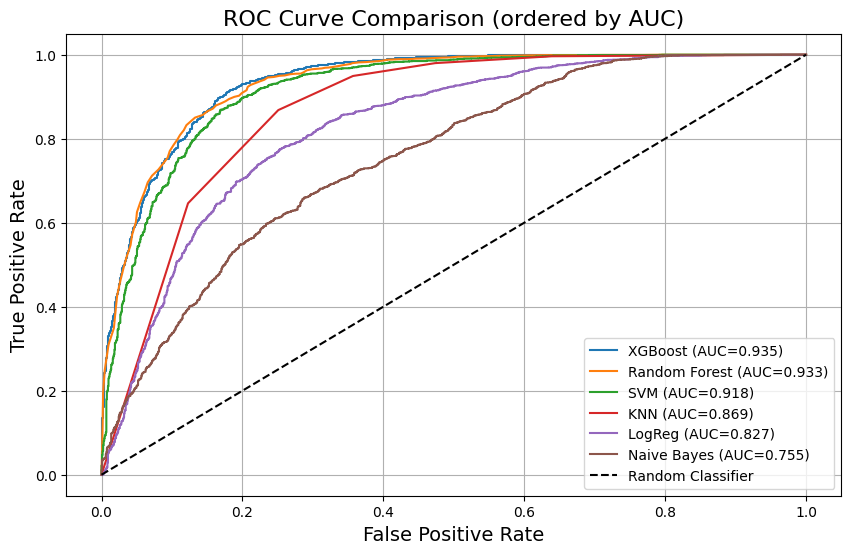

In [ ]:

# Create a list of tuples containing model name, FPR, TPR, and ROC AUC score
models_score = [
    ("LogReg", fpr_lr, tpr_lr, roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])),
    ("KNN", fpr_knn, tpr_knn, roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])),
    ("SVM", fpr_svc, tpr_svc, roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:, 1])),
    ("Random Forest", fpr_rf, tpr_rf, roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])),
    ("XGBoost", fpr_xgb, tpr_xgb, roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])),
    ("Naive Bayes", fpr_nb, tpr_nb, roc_auc_score(y_test, nb_clf.predict_proba(X_test)[:, 1])),
]

# Sort models by their ROC AUC score in descending order
models_score_sorted = sorted(models_score, key=lambda x: x[3], reverse=True)

# Plot ROC curves for all models in sorted order
plt.figure(figsize=(10, 6))

for name, fpr, tpr, auc_value in models_score_sorted:
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_value:.3f})")

# Plot reference diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison (ordered by AUC)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/ROC_ML.png", dpi=300)
plt.show()

# Hyperparameters Tuning

In [ ]:
# Tuning of Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Define parameter ranges
n_estimators_range = [200, 400, 600]
max_depth_range = [10, 30]
min_samples_split_range = [2, 5]
min_samples_leaf_range = [1, 2]
max_features_range = ['sqrt', 'log2']

# Creation of parameters grid dictionary
param_grid_rf = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
    'max_features': max_features_range
}

# Set up GridSearchCV to find the best hyperparameters using AUC as the scoring metric and 3-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                              scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on training data
grid_search_rf.fit(X_train, y_train)

print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print("Best AUC Score (Random Forest):", grid_search_rf.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters (Random Forest): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best AUC Score (Random Forest): 0.9393898627036826


In [ ]:
# Initialisation the Random Forest classifier with optimized hyperparameters and balanced class weights.
#best_params_rf = grid_search_rf.best_params_
#rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42, **best_params_rf)
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth = 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 400)
rf_clf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

print("*** Tuned Random Forest classification report: ***")
print(classification_report(y_test, y_pred_rf, digits=4))

*** Tuned Random Forest classification report: ***
              precision    recall  f1-score   support

           0     0.9011    0.7437    0.8149      1311
           1     0.8746    0.9563    0.9137      2451

    accuracy                         0.8822      3762
   macro avg     0.8879    0.8500    0.8643      3762
weighted avg     0.8839    0.8822    0.8792      3762



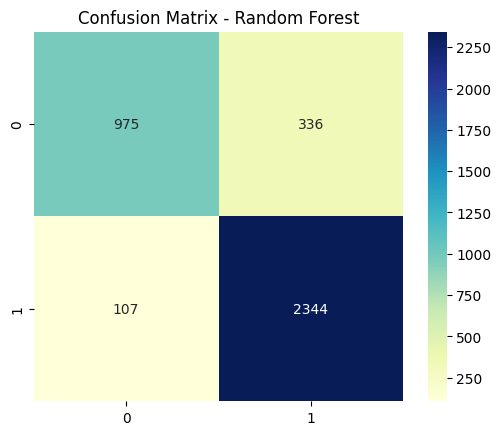

In [ ]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Matrix plot
sns.heatmap(cm_rf, square=True, cbar=True, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [20]:
# Tuning of XGBoost classifier
num_neg = sum(y_train == 0)
num_pos = sum(y_train == 1)
scale_pos_weight = num_neg / num_pos

In [ ]:
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Define parameter ranges
n_estimators_range = np.arange(100, 401, 100)
max_depth_range = np.arange(3, 9, 2)
learning_rate_range = [0.05, 0.10, 0.15, 0.2]
subsample_range = np.arange(0.6, 1.01, 0.2)

# Creation of parameters grid dictionary
param_grid_xgb = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'learning_rate': learning_rate_range,
    'subsample': subsample_range,

}

# Set up GridSearchCV to find the best hyperparameters using AUC as the scoring metric and 3-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                               scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on training data
grid_search_xgb.fit(X_train, y_train)

print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best AUC Score (XGBoost):", grid_search_xgb.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters (XGBoost): {'learning_rate': 0.05, 'max_depth': np.int64(5), 'n_estimators': np.int64(400), 'subsample': np.float64(0.6)}
Best AUC Score (XGBoost): 0.9412254073145477


In [ ]:
# Initialisation the Random Forest classifier with optimized hyperparameters and balanced class weights.
# xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,           # In case of not need of tuning
                            # scale_pos_weight=scale_pos_weight, learning_rate= 0.05, max_depth= 5, n_estimators= 400, subsample= 0.6)
best_params_xgb = grid_search_xgb.best_params_
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight, **best_params_xgb)

# Generate predictions on the test set
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("*** Tuned XGBoost classification report: ***")
print(classification_report(y_test, y_pred_xgb, digits=4))

*** Tuned XGBoost classification report: ***
              precision    recall  f1-score   support

           0     0.8513    0.8124    0.8314      1311
           1     0.9020    0.9241    0.9129      2451

    accuracy                         0.8852      3762
   macro avg     0.8767    0.8682    0.8722      3762
weighted avg     0.8844    0.8852    0.8845      3762



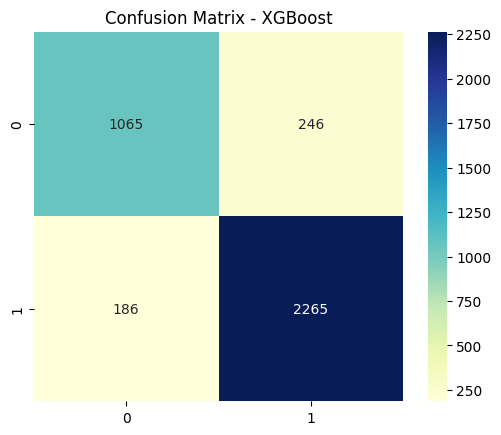

In [ ]:
# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Matrix plot
sns.heatmap(cm_xgb, square=True, cbar=True, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Confusion Matrix - XGBoost')
plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/confusion_matrix_xgb_new.png", dpi=300)
plt.show()

In [ ]:
# Tuning of SVM classifier
svm_clf = SVC(probability=True, random_state=42, class_weight="balanced")

# Creation of parameters grid dictionary
param_grid_svm = [
    {
        'kernel': ['linear'],
        'C': [ 400, 500]
    },
    {
        'kernel': ['rbf'],
        'C': [400, 500],
        'gamma': ['scale', 'auto']
    }
]

# Set up GridSearchCV to find the best hyperparameters using AUC as the scoring metric and 2-fold cross-validation (due to time constraints)
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm,
                           scoring='roc_auc', cv=2, n_jobs=-1, verbose=2)

# Perform the grid search on training data
grid_search_svm.fit(X_train_scaled, y_train)

print("Best parameters (SVM):", grid_search_svm.best_params_)
print("Best AUC Score (SVM):", grid_search_svm.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameters (SVM): {'C': 400, 'gamma': 'scale', 'kernel': 'rbf'}
Best AUC Score (SVM): 0.9140199767882167


In [ ]:
# Initialisation the Random Forest classifier with optimized hyperparameters and balanced class weights.
# best_params_svm = grid_search_svm.best_params_
# svc = SVC(probability=True, random_state=42, class_weight="balanced", **best_params_svm)
svc = SVC(probability=True, random_state=42, class_weight="balanced", C=400, gamma='scale', kernel='rbf')

# Generate predictions on the test set
svc.fit(X_train_scaled, y_train)

y_pred_svm = svc.predict(X_test_scaled)

print("*** Tuned SVM classification report: ***")
print(classification_report(y_test, y_pred_svm, digits=4))

*** Tuned SVM classification report: ***
              precision    recall  f1-score   support

           0     0.8401    0.7735    0.8054      1311
           1     0.8838    0.9213    0.9021      2451

    accuracy                         0.8698      3762
   macro avg     0.8619    0.8474    0.8538      3762
weighted avg     0.8685    0.8698    0.8684      3762



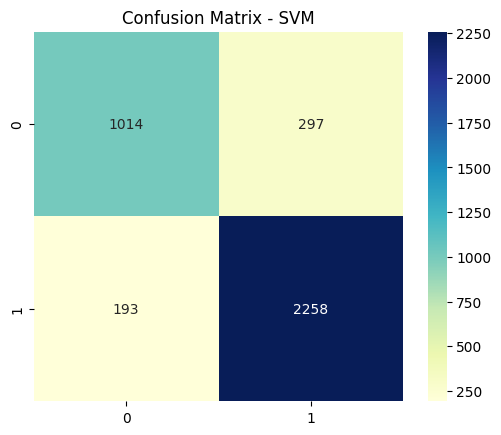

In [ ]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Matrix plot
sns.heatmap(cm_svm, square=True, cbar=True, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Confusion Matrix - SVM')
plt.show()

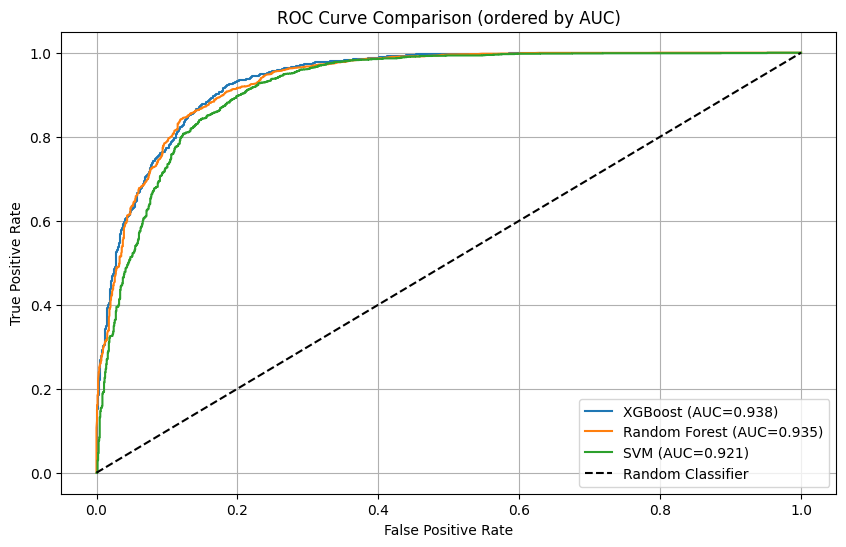

In [ ]:
# New ROC calculation and plot
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.predict_proba(X_test_scaled)[:, 1])

models_score = [
    ("SVM", fpr_svc, tpr_svc, roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:, 1])),
    ("Random Forest", fpr_rf, tpr_rf, roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])),
    ("XGBoost", fpr_xgb, tpr_xgb, roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])),
]

models_score_sorted = sorted(models_score, key=lambda x: x[3], reverse=True)

plt.figure(figsize=(10, 6))

for name, fpr, tpr, auc_value in models_score_sorted:
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_value:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (ordered by AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# XGBoost has been identified as the best model, let's now see its performace focusing to maximize the true positive rate

# Get predicted probabilities and ROC curve for the positive class (class 1 = gamma)
y_scores = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Find indices where the false positive rate (FPR) is below 5%
low_fpr_idx = np.where(fpr < 0.05)[0]

# Select the threshold with the highest TPR
best_idx = low_fpr_idx[-1]
threshold_01 = thresholds[best_idx]
print(f"\nThreshold selected (FPR < 0.05): {threshold_01:.4f}")

# Generate predictions using the selected threshold
y_pred_custom = (y_scores >= threshold_01).astype(int)

# Evaluate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
cm = confusion_matrix(y_test, y_pred_custom)

print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")


Threshold selected (FPR < 0.05): 0.8571
Precision: 0.9593
Recall (TPR): 0.6259


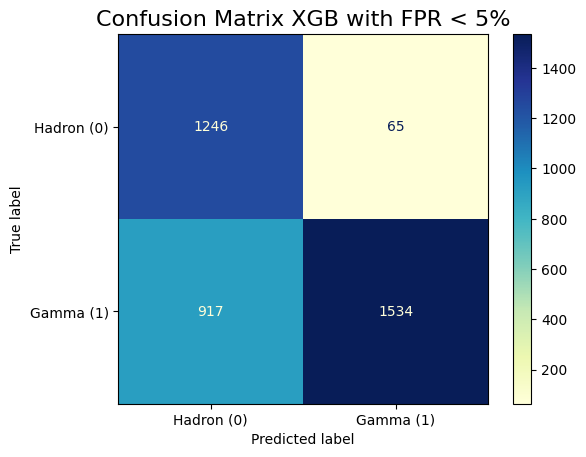

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hadron (0)", "Gamma (1)"])

disp.plot(cmap='YlGnBu')
plt.title(f"Confusion Matrix XGB with FPR < 5%", fontsize=16)

plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/confusion_matrix_xgb_thresh_new_5.png", dpi=300)
plt.show()

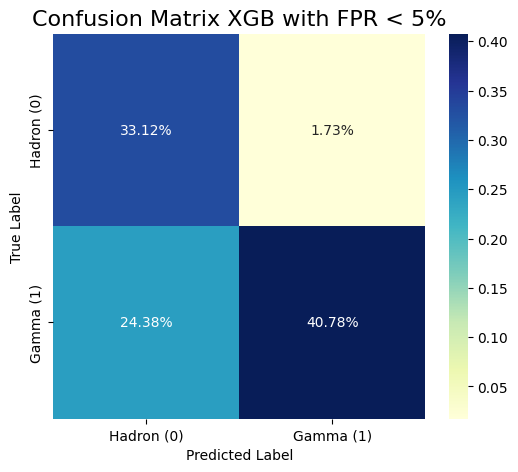

In [ ]:
# Confusion matrix with percentage
cm_normalized = cm / np.sum(cm)
labels = ["Hadron (0)", "Gamma (1)"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

plt.title(f"Confusion Matrix XGB with FPR < 5%", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/confusion_matrix_xgb_thresh_perc_5.png", dpi=300)
plt.show()

In [ ]:
# Get predicted probabilities and ROC curve for the positive class (class 1 = gamma)
y_scores = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Find indices where the false positive rate (FPR) is below 10%
low_fpr_idx = np.where(fpr < 0.10)[0]

# Select the threshold with the highest TPR
best_idx = low_fpr_idx[-1]
threshold_01 = thresholds[best_idx]
print(f"\nThreshold selected (FPR < 0.10): {threshold_01:.4f}")

# Generate predictions using the selected threshold
y_pred_custom = (y_scores >= threshold_01).astype(int)

# Evaluate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
cm = confusion_matrix(y_test, y_pred_custom)

print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")


Threshold selected (FPR < 0.10): 0.7519
Precision: 0.9353
Recall (TPR): 0.7727


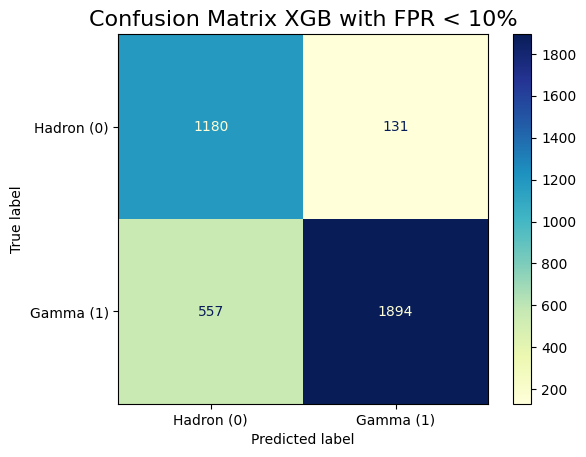

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hadron (0)", "Gamma (1)"])

disp.plot(cmap='YlGnBu')
plt.title(f"Confusion Matrix XGB with FPR < 10%", fontsize=16)

plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/confusion_matrix_xgb_thresh_new_10.png", dpi=300)
plt.show()

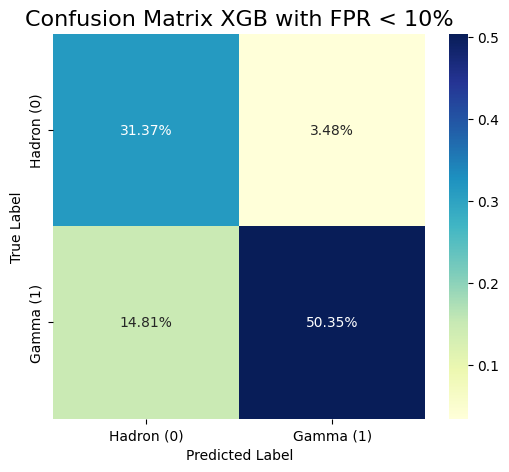

In [ ]:
# Confusion matrix with percentage
cm_normalized = cm / np.sum(cm)
labels = ["Hadron (0)", "Gamma (1)"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

plt.title(f"Confusion Matrix XGB with FPR < 10%", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("/content/drive/MyDrive/MAGIC ML/immagini/confusion_matrix_xgb_thresh_perc_10.png", dpi=300)
plt.show()